# Analyzing Stock Data

## Getting stock data from 'Yahoo! Finance'

In [8]:
# import 'pandas' and 'datetime'
import pandas as pd
from pandas.io import data as web
import datetime

# set start and end time (year-to-date)
start = datetime.datetime(2016,1,1)
end = datetime.date.today()

# get data for 'GPRO'
data_gopro = web.DataReader("GPRO", "yahoo", start, end)

# view data
type(data_gopro)
data_gopro.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,17.570000,19.650000,17.500000,18.690001,10436100,18.690001
2016-01-05,20.049999,20.500000,18.250000,18.490000,16303300,18.490000
2016-01-06,18.180000,19.000000,18.049999,18.410000,6513500,18.410000
2016-01-07,17.889999,18.200001,16.750000,17.000000,10116700,17.000000
2016-01-08,17.590000,17.660000,16.131001,16.190001,7661900,16.190001


Stock data explained:
- 'Open' is the price of the stock in the beginning of the day
- 'High/ Low' is the highest and lowest price for that stock during the day
- 'Close' is the price of the stock in the end of the day
- 'Volume' is the amount of stock traded during the day
- 'Adj Close' is the price of the stock in the end of the day when adjusted to corporate actions (such as dividends and splits).

## Visualizing stock data

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


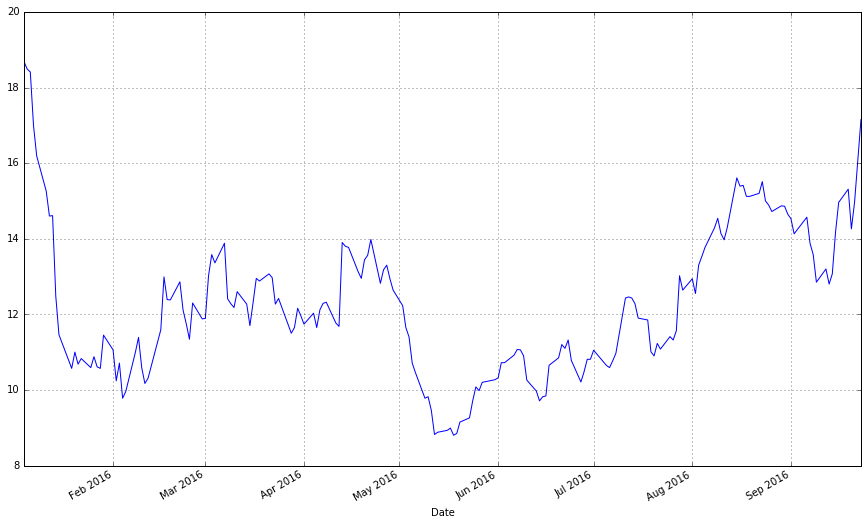

In [9]:
# import 'matplotlib' and 'pylab'
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import pylab

# jupyter notebook settings for plots
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

# plot the adjusted closing price of 'GPRO'
data_gopro["Adj Close"].plot(grid = True)

## Modelling relative returns

$\text{return}_{t,0} = \frac{\text{price}_t}{\text{price}_0}$

In [10]:
# get data for 'MSFT'
data_microsoft = web.DataReader("MSFT", "yahoo", start, end)

# get data for 'GOOGL'
data_google = web.DataReader("GOOGL", "yahoo", start, end)

# add stock data to pandas dataframe
stocks = pd.DataFrame({"MSFT": data_microsoft["Adj Close"],
                      "GOOG": data_google["Adj Close"]})

# view data
stocks.head()

,GOOG,MSFT
Date,,
2016-01-04,759.440002,53.696756
2016-01-05,761.530029,53.941723
2016-01-06,759.330017,52.961855
2016-01-07,741.000000,51.119702
2016-01-08,730.909973,51.276485


In [11]:
# transform the data to show relative return
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.head()

,GOOG,MSFT
Date,,
2016-01-04,1.000000,1.000000
2016-01-05,1.002752,1.004562
2016-01-06,0.999855,0.986314
2016-01-07,0.975719,0.952007
2016-01-08,0.962433,0.954927


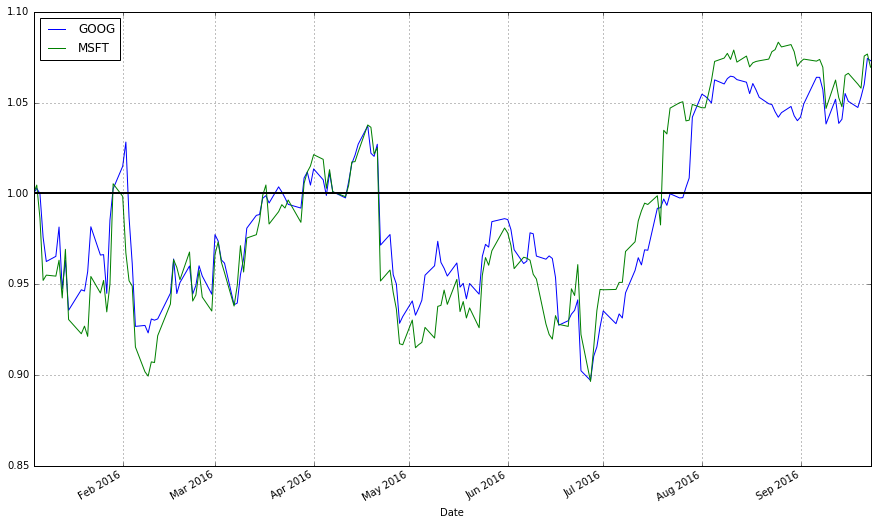

In [12]:
# plot the relative return for stocks
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

## Modelling logarithmic differences (percentage change)

$change_t = \log(\text{price}_{t}) - \log(\text{price}_{t - 1})$

In [13]:
# import 'numpy'
import numpy as np

# transform the data to show percentage change
stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1)))
stock_change.head()

,GOOG,MSFT
Date,,
2016-01-04,NaN,NaN
2016-01-05,0.002748,0.004552
2016-01-06,-0.002893,-0.018332
2016-01-07,-0.024436,-0.035402
2016-01-08,-0.013710,0.003062


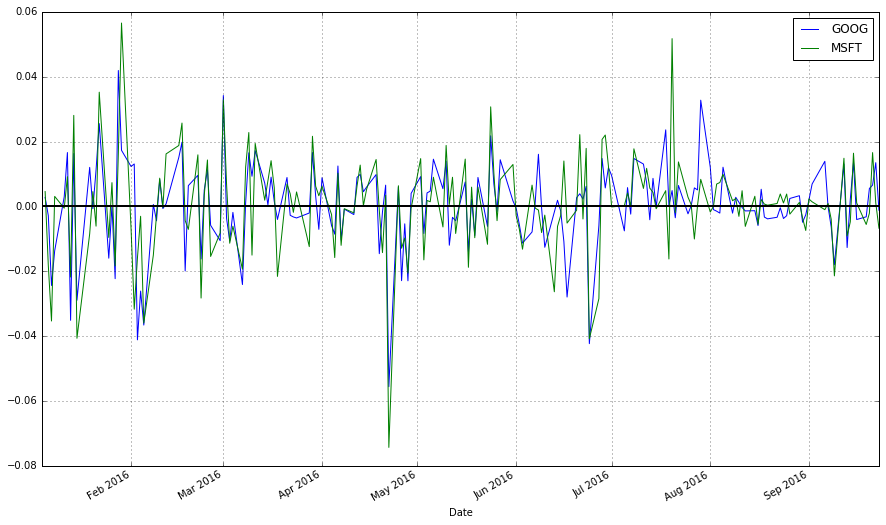

In [14]:
# plot the percentage change for stocks
stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2)